In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

ModuleNotFoundError: No module named 'keras'

In [ ]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    print(X.shape)
    print(t.shape)
    return X, t

In [ ]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t = []
    for i in range(len(t_indices)):
        temp = [0.0 for j in range(N)]
        temp[t_indices[i]] = 1.0
        t.append(np.array(temp))
    t_1hot = np.array(t)
    return t_1hot

In [ ]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

In [ ]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train = X
    t_train = t
    test = np.int_(testFraction*(np.size(X,0)))
    ntest = np.sort(np.array(np.random.choice(np.size(X,0)-1, test, replace=False)))
    X_test = []
    t_test = []
    for i in range(len(ntest)):
        X_test.append(X_train[ntest[i]-i])
        t_test.append(t_train[ntest[i]-i])
        t_train = np.delete(t_train,ntest[i]-i,0)
        X_train = np.delete(X_train,ntest[i]-i,0)
    t_test = np.array(t_test)
    X_test = np.array(X_test)
    return X_train, t_train, X_test, t_test

In [ ]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

In [ ]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train_normalized = (X_train - np.mean(X_train, axis = 0))/(np.std(X_train,axis = 0))
    X_test_normalized = (X_test - np.mean(X_train, axis = 0))/(np.std(X_train,axis = 0))
    return X_train_normalized, X_test_normalized

In [ ]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

In [ ]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = 1/(1 + np.exp(-x))
    return y

In [ ]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

In [ ]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = (np.exp(x))/(np.sum(np.exp(x)))
    return y

In [ ]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

In [ ]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = (x)*(1-x)
    return y

In [ ]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    
    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

(150, 4)
(150,)
480.49735662036716
469.9451128912231
460.83663146980865
452.9668663551191
446.1564967303314
440.2509745189352
435.1184496845749
430.647171023612
426.7427645427423
423.3256329793941
420.3286048738378
417.6948849660534
415.3763108274617
413.33189477757446
411.52661805039935
409.9304405189867
408.5174903873982
407.2654017425722
406.1547722728822
405.1687179749641
404.2925058519441
403.513249263252
402.8196536676353
402.201803031193
401.6509792113777
401.1595082488484
400.7206287746665
400.3283787369993
399.977497426614
399.6633403818208
399.3818052200037
399.12926680533366
398.9025204450757
398.6987320287668
398.5153942000414
398.35028779090055
398.201447861214
398.06713377837514
397.94580284813316
397.83608707112177
397.73677265326666
397.64678194397646
397.565157515379
397.4910481299786
397.4236963738653
397.3624277586862
397.3066411185373
397.25580014818877
397.20942594695083
397.1670904483347
397.12841062970057
397.0930434085184
397.0606811428848
397.0310476636927
397.

396.7166635179474
396.71667767463566
396.71669175597873
396.7167057625119
396.71671969476597
396.7167335532668
396.7167473385362
396.7167610510902
396.7167746914413
396.71678826009656
396.7168017575599
396.7168151843287
396.71682854089806
396.7168418277577
396.7168550453928
396.7168681942849
396.71688127491103
396.71689428774425
396.71690723325355
396.7169201119037
396.71693292415483
396.7169456704644
396.71695835128463
396.716970967065
396.7169835182505
396.7169960052815
396.717008428596
396.7170207886276
396.71703308580624
396.7170453205585
396.71705749330636
396.71706960446954
396.71708165446285
396.71709364369934
396.7171055725864
396.71711744153015
396.7171292509315
396.7171410011888
396.71715269269674
396.7171643258479
396.7171759010295
396.7171874186275
396.7171988790231
396.7172102825959
396.7172216297204
396.71723292077
396.7172441561134
396.7172553361171
396.71726646114473
396.71727753155596
396.717288547709
396.71729950995734
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

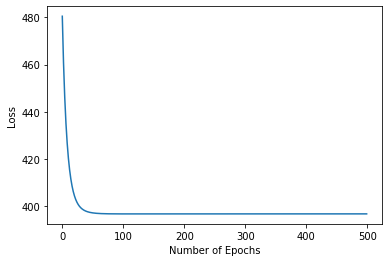

In [32]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,t = loadIrisData()
    X_train, t_train, X_test, t_test = splitData(X,t,0.2)
    t_train_one_hot = one_hot_encoding(t_train,np.size(np.unique(t)))
    
if __name__=="__main__":
    experiment()